In [38]:
import os, sys

In [44]:
import numpy as np 
import pandas as pd

from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
data_dir="../data/raw"

train = pd.read_csv(f'{data_dir}/train.csv')
test = pd.read_csv(f'{data_dir}/test.csv')

print(train.shape, test.shape)

(891, 12) (418, 11)


In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## data anaylsis by columns

In [31]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


devide dataset type

**Categorical**

- Pclass
- Sex
- Embarked


**Numerical**
- Age
- SibSp
- Parch
- Fare

**Etc**
- Name
- Ticket
- Cabin

### Categorical

In [127]:
def check_categorical_histogram(df:pd.DataFrame(), label:str, column_list:list):
    label_list = set(df[label])
    label_cnt = len(label_list)
    c_cnt = len(column_list)
    
    fig = plt.figure(constrained_layout = True, figsize=[3*c_cnt, 5*label_cnt])
    subfigs = fig.subfigures(c_cnt, 1)
    
    for i, col in enumerate(column_list):
        temp_df = df
        if bool(pd.isnull(df[col]).sum()):
            print(f'{col} contains NaN')
            temp_df = df[~pd.isnull(df[col])]
        axs = subfigs[i].subplots(1, label_cnt)
        
        for j, l in enumerate(label_list):
            temp_df2 = temp_df[temp_df[label]==l]
            axs[j].hist(temp_df2[col].sort_values(), density=True)
            if not i:
                axs[j].set_title(f'{label} {j}')
                axs[j].set_ylabel(f'{col} distribution')
            else:
                axs[j].sharey(axs[0])
            
    

Embarked contains NaN


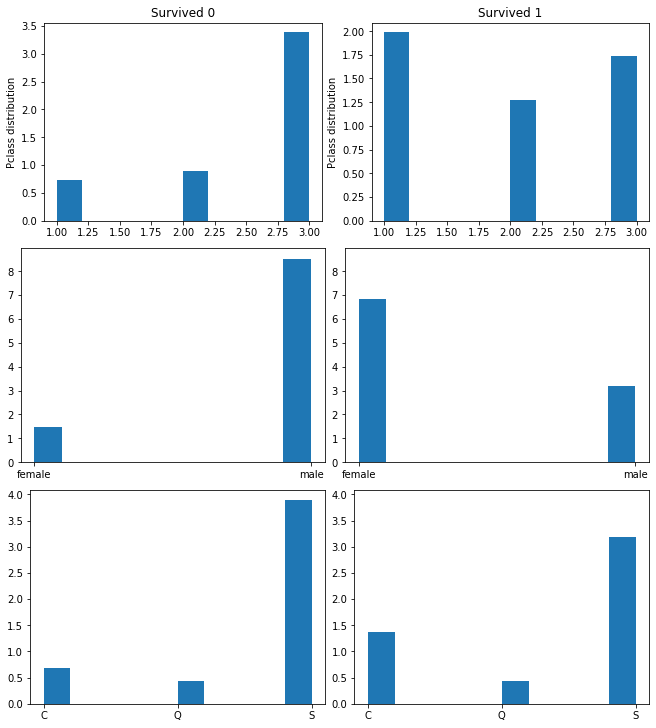

In [128]:
check_categorical_histogram(train, 'Survived', col_list)